In [1]:
%matplotib inline
%pylab inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.colors import LogNorm

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ..

C:\Users\ChiefGuti\Documents\Lund University\Thesis\MLImplementacion


In [3]:
cd QAM2bit/

C:\Users\ChiefGuti\Documents\Lund University\Thesis\MLImplementacion\QAM2bit


In [4]:
def BER(x,y):
    j=0
    for i in range(len(x)):
        if(x[i]!=y[i]):
            j+=1
    return(j/len(x))
def NormData(DataSet,data):
    for i in range(len(data[:,0])):
        DataSet[i,0]=data[:,0][i]
        DataSet[i,1]=data[:,1][i]
    DataSet[:,0]=DataSet[:,0]/max(DataSet[:,0])
    DataSet[:,1]=DataSet[:,1]/max(DataSet[:,1])

In [5]:
R=[2,3,4,5,6,8]
OSNR=[5,9,11,13,15,17]

In [6]:
BERreal=[]
for i in OSNR:    
    berreal=[]
    with open('BERdata2b%iOSNR.txt'%i) as f:   
        for line in f:
            if 'SER_MC:' in line:
                berreal.append(line)
    BER1=[]            
    for i in berreal:
        BER1.append(float(i.split()[1]))
    BERreal.append(BER1[0::2])

In [7]:
Code=loadtxt('PBRSout.txt',skiprows=5)

CodeWord=[]
for i in range(len(Code)):
    CodeWord.append(str(int(Code[i])))
    
j=0
CodeE=[]
CodeO=[]
Word=[]
for i in range(len(CodeWord)):
    if (j==0):
        CodeE.append(CodeWord[i])
        j=1
    else:
        CodeO.append(CodeWord[i])
        j=0
        
for i in range(len(CodeE)):
    Word.append(CodeE[i]+CodeO[i])
Org=['00','01','10','11']
Cmap=[0,1,2,3]
Map=zeros(len(Word))
for i in range(len(Word)):
    if(Word[i]==Org[0]):
        Map[i]=Cmap[0]
    if(Word[i]==Org[1]):
        Map[i]=Cmap[1]
    if(Word[i]==Org[2]):
        Map[i]=Cmap[2]
    if(Word[i]==Org[3]):
        Map[i]=Cmap[3]

In [8]:
ber=zeros((len(R),len(OSNR)))
for r in range(len(R)):
    for osnr in range(len(OSNR)):
        data = loadtxt('OutRx_DualPol2bOSNR%iR%i.txt'%(OSNR[osnr],R[r]),delimiter=';')
        data=data[1::2][:]
        DataSet=zeros((len(data),2))
        NormData(DataSet,data)
        X_train, X_test, y_train, y_test = train_test_split(DataSet, Map, test_size = 0.20)
        svclassifier = SVC(kernel='rbf',C=1,gamma=0.001)
        svclassifier.fit(X_train, y_train)
        y_pred = svclassifier.predict(X_test)
        ber[r,osnr]=BER(y_test,y_pred)
        #print(confusion_matrix(y_test,y_pred))
        #print(classification_report(y_test,y_pred))

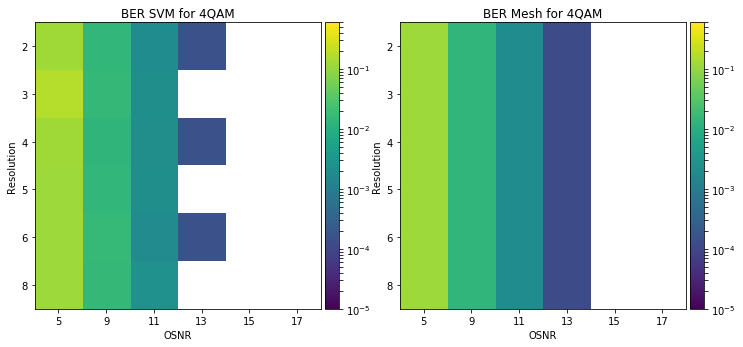

In [10]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig,ax=subplots(1,2,figsize=(12,6))
im1 = ax[0].imshow(ber,norm=LogNorm(vmin=0.00001,vmax=0.6))
ax[0].set_yticklabels((0,2,3,4,5,6,8))
ax[0].set_xticklabels((0,5,9,11,13,15,17))
ax[0].set_ylabel('Resolution')
ax[0].set_title('BER SVM for 4QAM')
ax[0].set_xlabel('OSNR')
divider = make_axes_locatable(ax[0])
cax1 = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im1, cax=cax1)

im2 = ax[1].imshow(transpose(BERreal),norm=LogNorm(vmin=0.00001,vmax=0.6))
ax[1].set_yticklabels((0,2,3,4,5,6,8))
ax[1].set_xticklabels((0,5,9,11,13,15,17))
divider = make_axes_locatable(ax[1])
cax2 = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im2, cax=cax2)
ax[1].set_ylabel('Resolution')
ax[1].set_title('BER Mesh for 4QAM')
ax[1].set_xlabel('OSNR')
savefig('BER4QAM.png')

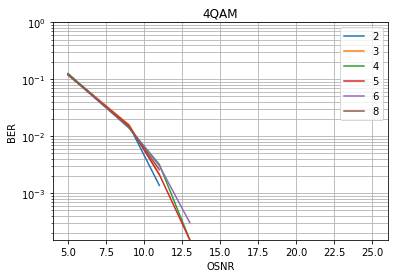

In [15]:
for r in range(len(R)):
    semilogy(OSNR,ber[r,:],label=R[r])
    grid(True,which='both')
    legend()
    ylim(0,1)
    ylabel('BER')
    xlabel('OSNR')
title('4QAM')
savefig('4QAMplot.png')